Link to dataset : https://drive.google.com/file/d/1sbQ5WJ-KCPBrhT2YagtaARGoujCMpB8Q/view

# SA-2025 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [34]:
!pip install --upgrade scikit-learn  #There was an error with importing confusion_matrix from sklearn.mertices , so there was a need to upgrade it for google colab
# even after upgrading the plot_confusion_matrix didnt worked as it has been changed in new version

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### Read the data

In [36]:
data=pd.read_csv('https://drive.google.com/uc?export=download&id=1sbQ5WJ-KCPBrhT2YagtaARGoujCMpB8Q')

#### Check the shape of data. It should be  (8693, 14)

In [37]:
data.shape

(8693, 14)

#### Apply describe on dataframe

In [38]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [39]:
data.describe(include='object')

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,9280_02,Earth,G/734/S,Andromeda,Alraium Disivering
freq,1,4803,207,6097,202


#### Check if there any null value in the dataset.

In [40]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


#### Number continuous and categorical features

In [41]:

cont_data=data.select_dtypes(include=['int64','float64'])
cat_data=data.select_dtypes(include=['object'])
print('Number of continuous features :',len(cont_data.columns))
print('Number of categorical features :',len(cat_data.columns))

Number of continuous features : 6
Number of categorical features : 5


#### Unique values

In [42]:

cat_data.nunique()


,0
PassengerId,8693
HomePlanet,3
Cabin,6560
Destination,3
Name,8473


<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [43]:

data.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)
data.shape

(8693, 11)

#### One Hot Encoding

In [44]:
# Hint: search for get_dummies
data=pd.get_dummies(data,drop_first=True).astype(int)

data.shape



(8693, 13)

#### Changing bool columns to 0,1

In [45]:


data['CryoSleep'] = data['CryoSleep'].astype(int)
data['VIP'] = data['VIP'].astype(int)
data['Transported'] = data['Transported'].astype(int)

data.head()




,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_Cygnus,Destination_Virgo
0,0,39,0,0,0,0,0,0,0,1,0,0,0
1,0,24,0,109,9,25,549,44,1,0,0,0,0
2,0,58,1,43,3576,0,6715,49,0,1,0,0,0
3,0,33,0,0,1283,371,3329,193,0,1,0,0,0
4,0,16,0,303,70,151,565,2,1,0,0,0,0


#### Split the data into train and test

In [46]:

from sklearn.model_selection import train_test_split
x=data.drop('Transported',axis=1)
y=data['Transported']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=2022)


In [47]:

print("x_train: ",x_train.shape)
print("x_test :" ,x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


x_train:  (6519, 12)
x_test : (2174, 12)
y_train (6519,)
y_test (2174,)


#### Scale the data using Standard Scaler

In [48]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [49]:

from sklearn.linear_model import LogisticRegression
reg_model=LogisticRegression(random_state=2021)
reg_model.fit(x_train,y_train)
reg_model.score(x_test,y_test)



0.7861085556577737

#### Plot confusion matrix

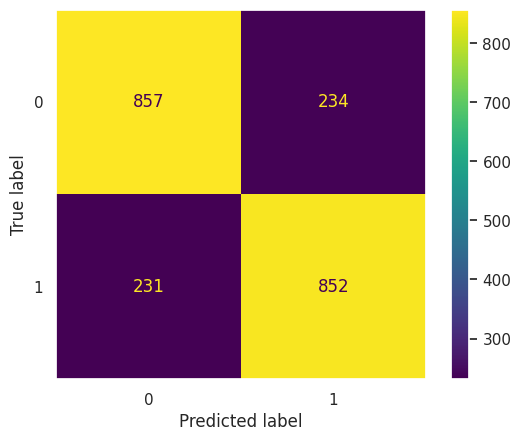

In [50]:

y_pred=reg_model.predict(x_test)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.show()


#### Print classification report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1091
           1       0.78      0.79      0.79      1083

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



#### Print accuracy score

In [52]:
print(f"Training_accuracy: {reg_model.score(x_train,y_train)}")
print(f"Testing_accuracy: {reg_model.score(x_test,y_test)}")

Training_accuracy: 0.7867771130541494
Testing_accuracy: 0.7861085556577737


#### Print ROC-AUC score

In [53]:
!pip install scikit-learn

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = reg_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print(f"ROC-AUC score: {roc_auc_score(y_test, y_prob)}")

ROC-AUC score: 0.8681883080995944


#### Plot ROC-AUC Curve

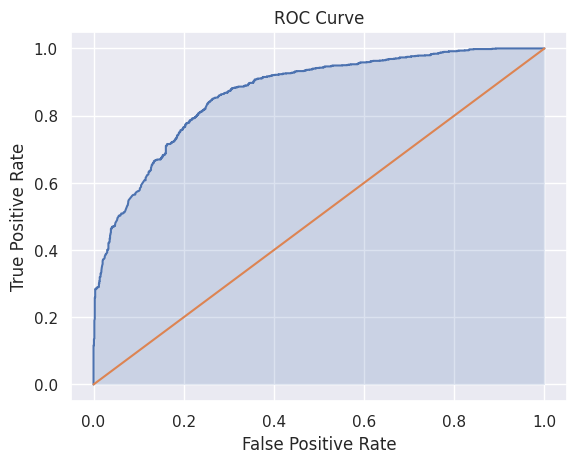

In [55]:

plt.plot(fpr,tpr,)
plt.plot([0,1],[0,1])
plt.fill_between(fpr, tpr, alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
sns.set()


#### Cross validation

In [56]:

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(reg_model,x_train,y_train,cv=5)
print(cv_score)
print(f"Mean cross validation score: {cv_score.mean()}")

[0.8006135  0.77300613 0.78067485 0.79371166 0.77206447]
Mean cross validation score: 0.7840141203169655


## <b>SVM</b>
#### Use default parameters unless mentioned

In [57]:
from sklearn.svm import SVC
svm_model=SVC(kernel='poly',degree=3,C=5, probability=True)
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)

0.7833486660533578

#### Plot confusion matrix

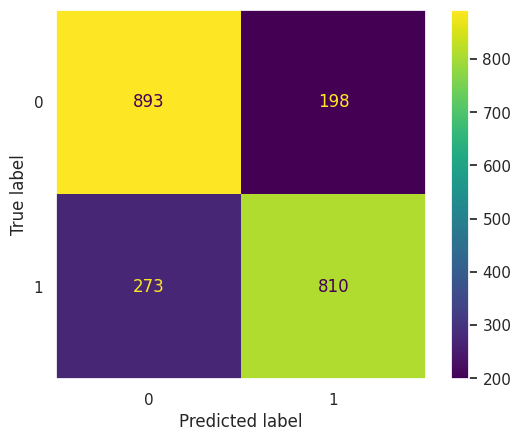

In [58]:
y_pred=svm_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.show()

#### Print classification report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1091
           1       0.80      0.75      0.77      1083

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



#### Print accuracy score

In [60]:
print(f"Training_accuracy: {svm_model.score(x_train,y_train)}")
print(f"Testing_accuracy: {svm_model.score(x_test,y_test)}")

Training_accuracy: 0.7949071943549624
Testing_accuracy: 0.7833486660533578


#### Print ROC-AUC score

In [65]:
y_prob = svm_model.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob)
print(f"ROC-AUC score: {roc_auc_score(y_test, y_prob)}")

ROC-AUC score: 0.8664414545940807


#### Plot ROC-AUC curve

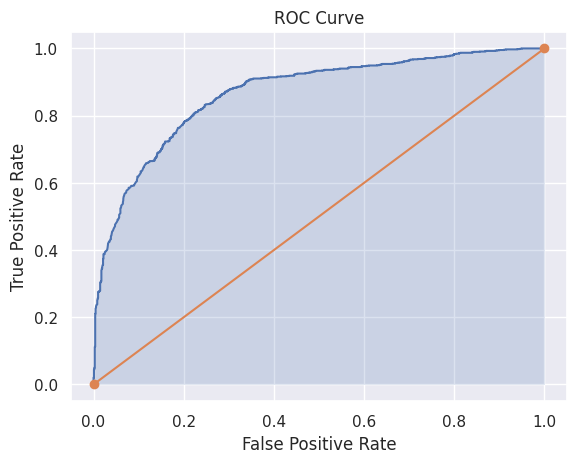

In [85]:
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'o-')
plt.fill_between(fpr1, tpr1, alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
sns.set()

#### Cross validation

In [64]:
cv_score=cross_val_score(svm_model,x_train,y_train,cv=5)
print(cv_score)
print(f"Mean cross validation score: {cv_score.mean()}")


[0.78067485 0.77300613 0.77684049 0.78220859 0.76438987]
Mean cross validation score: 0.7754239861763086


**Summary**

Both Logistic Regression and SVM models performed very similarly on this dataset in terms of accuracy and ROC-AUC score.

# Congratulations! Assignment Completed!